#**O que aprendemos nessa aula:**

Como construir os primeiros gráficos com Seaborn;

Como fazer comparações dos resultados de forma proporcional a população;

Como analisar gráficos como de gastos_por_habitantes X população e gastos X população, comparando suas diferenças e gerando hipóteses;

O que são e como usar Type hints.

##**Importando as bibliotecas**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from bs4 import BeautifulSoup 
import requests
from io import StringIO



##**Importando os dados**

In [23]:
dados = pd.read_csv('https://raw.githubusercontent.com/vqrca/bootcamp_alura_aulas/main/Modulo_2/gastos_totais_ano_mes_atendimento.csv', encoding='ISO-8859-1', 
                    skiprows = 3, sep=';', skipfooter=12, thousands='.', decimal=',')
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [24]:
pd.options.display.float_format = "{:.2f}".format #tirando notação científica

In [25]:
#Checando quais são as colunas usáveis:
dados.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [26]:
#Guardando as colunas usáveis numa variável:
colunas_usaveis = dados.mean().index
colunas_usaveis 


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [27]:
dados[colunas_usaveis]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,28461

In [28]:
#recuperando o nome das Unidades da Federação:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação") #inserir na posição 0
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [29]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

In [30]:
#Definindo o index:
usaveis = usaveis.set_index('Unidade da Federação')
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [31]:
#Ordenando as colunas de Unidade da Federação pelo valor 'Total' e excluindo a coluna 'Total' em seguida:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

In [32]:
#vendo o último mês
mes_mais_recente = ordenado_por_total.columns[-1]


In [33]:
gastos_ultimo_mes = ordenado_por_total[mes_mais_recente]
gastos_ultimo_mes.head()

Unidade da Federação
35 São Paulo           177408317.71
31 Minas Gerais         79780838.00
41 Paraná               43480729.07
43 Rio Grande do Sul    37798832.80
33 Rio de Janeiro       49149884.48
Name: 2021/Mar, dtype: float64

Se quisermos saber se os gastos são proporcionais em todos os Estados, basta somar tudo, algo que conseguimos com a função `.sum`:

In [34]:
gastos_ultimo_mes.sum()

652420247.8699999

Esse é o valor total. Agora basta pegar o valor gasto em cada estado e dividir pelo total:

In [35]:
gastos_proporcionais = gastos_ultimo_mes / gastos_ultimo_mes.sum()
gastos_proporcionais

Unidade da Federação
35 São Paulo             0.27
31 Minas Gerais          0.12
41 Paraná                0.07
43 Rio Grande do Sul     0.06
33 Rio de Janeiro        0.08
29 Bahia                 0.05
26 Pernambuco            0.06
42 Santa Catarina        0.03
23 Ceará                 0.03
52 Goiás                 0.04
15 Pará                  0.02
21 Maranhão              0.03
32 Espírito Santo        0.02
24 Rio Grande do Norte   0.01
25 Paraíba               0.02
53 Distrito Federal      0.02
50 Mato Grosso do Sul    0.01
22 Piauí                 0.01
27 Alagoas               0.01
51 Mato Grosso           0.01
13 Amazonas              0.01
28 Sergipe               0.00
17 Tocantins             0.00
11 Rondônia              0.01
12 Acre                  0.00
14 Roraima               0.00
16 Amapá                 0.00
Name: 2021/Mar, dtype: float64

Agora temos o gasto proporcional: 27% foi para São Paulo, 12% para Minas Gerais. Será que 27% da população está em São Paulo? Será que 12% está em Minas Gerais?

In [36]:
#Gastos proporcionais ordenados do maior para o menor:
gastos_proporcionais_sort = gastos_proporcionais.sort_values(ascending=False)
gastos_proporcionais_sort 

Unidade da Federação
35 São Paulo             0.27
31 Minas Gerais          0.12
33 Rio de Janeiro        0.08
41 Paraná                0.07
26 Pernambuco            0.06
43 Rio Grande do Sul     0.06
29 Bahia                 0.05
52 Goiás                 0.04
42 Santa Catarina        0.03
21 Maranhão              0.03
23 Ceará                 0.03
32 Espírito Santo        0.02
53 Distrito Federal      0.02
15 Pará                  0.02
25 Paraíba               0.02
22 Piauí                 0.01
51 Mato Grosso           0.01
24 Rio Grande do Norte   0.01
27 Alagoas               0.01
13 Amazonas              0.01
11 Rondônia              0.01
50 Mato Grosso do Sul    0.01
28 Sergipe               0.00
14 Roraima               0.00
12 Acre                  0.00
16 Amapá                 0.00
17 Tocantins             0.00
Name: 2021/Mar, dtype: float64

Valores plotados em gráfico de barras:

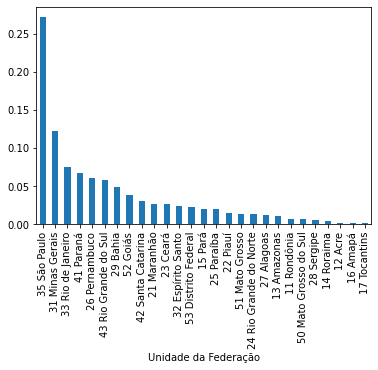

In [37]:
gastos_proporcionais_sort.plot(kind='bar')

Porém, para saber se os gastos relativos estão proporcionais é necessário carregar de alguma forma a população de cada um desses estados.
Uma das formas é copiar e colar uma tabela da Wikipedia no Colab e tentar atribuir esses dados a uma variável dados_da_populacao:

In [38]:
dados_da_populacao = ''' Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

#fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

É possível, no Python, importar a o pacote **StringIO** (string entrada e saída) da biblioteca io. Podemos definir que `dados_da_populacao_io` é um fluxo de entrada e saída a partir da função `StringIO(dados_da_populacao)`: 

In [40]:
dados_da_populacao_io = StringIO(dados_da_populacao) #criar um leitor de strings

populacao = pd.read_csv(dados_da_populacao_io , sep='\t') #'\t' é tab
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


Só estamos interessados em dois campos: populacao, que é o populacao[“População”] e UF. Poderíamos simplesmente renomear a coluna, mas é simplesmente mais fácil atribuir populacao["Unidade federativa"] à uma coluna populacao["uf"]:

In [41]:
populacao["populacao"] = populacao["População"] 
populacao["uf"] = populacao["Unidade federativa"]
display(populacao.head())
display(populacao.info())

,Posição,Unidade federativa,População,% da pop. total,País comparável,populacao,uf
0,(habitantes),NaN,NaN,NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864),46 289 333,São Paulo
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21 292 666,Minas Gerais
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17 366 189,Rio de Janeiro
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000),14 930 634,Bahia Bahia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0    Posição            28 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     object
 6   uf                  27 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


None

No retorno do info, a coluna populacao é um objeto. Por que é objeto? Dois motivos:

Primeiro, porque eu tenho um "Not a Number" (NaN), eu tenho um texto aqui que não faz sentido, que é esse lixo. 
 
E, segundo, por causa dos espaços entre os algarismos.

Se você tentar transformar o campo populacao como tipo inteiro com `astype(int)`, dá o erro “Não consigo converter o float NaN para um inteiro”, porque tem "Not a Number". Então temos que jogar fora as linhas vazias. Basta executarmos um `dropna()`:

In [42]:
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].astype(int)
populacao["uf"] = populacao["Unidade federativa"]
display(populacao.head())
display(populacao.info())

ValueError: ignored

Após a execução, receberemos um novo erro informando que o valor "46 289 333" não é um inteiro (int), então nós precisamos transformar esse valor. Poderíamos ir para dois caminhos, um é um formatador de número para string, e o outro é arrancar esses espaços fora. Vamos na segunda opção.

In [43]:
populacao = populacao.dropna() #jogar fora linhas vazias
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int) #usar str pois os dados estavam em strings. A função replace retira os espaços!
#astype(int) muda para inteiros
populacao["uf"] = populacao["Unidade federativa"]
populacao =  populacao[["populacao", "uf"]] #pegar só as colunas de interesse
display(populacao.head())
display(populacao.info())

,populacao,uf
1,46289333,São Paulo
2,21292666,Minas Gerais
3,17366189,Rio de Janeiro
4,14930634,Bahia Bahia
5,11516840,Paraná


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   populacao  27 non-null     int64 
 1   uf         27 non-null     object
dtypes: int64(1), object(1)
memory usage: 648.0+ bytes


None

Esse `.str` é do Pandas e te disponibiliza várias coisas para fazer com string, uma delas sendo o `replace()`. Ao executar, vamos conseguir substituir os espaços. No retorno do `info()`, veremos que populacao agora é um inteiro

In [44]:
dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao =  populacao[["populacao", "uf"]].set_index('uf') #definindo index
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

Agora vamos tentar cruzar os dados (gastos_ultimo_mes + populacao):

In [45]:
#série
gastos_ultimo_mes

Unidade da Federação
35 São Paulo             177408317.71
31 Minas Gerais           79780838.00
41 Paraná                 43480729.07
43 Rio Grande do Sul      37798832.80
33 Rio de Janeiro         49149884.48
29 Bahia                  31314602.44
26 Pernambuco             39472738.81
42 Santa Catarina         19375822.56
23 Ceará                  17173151.55
52 Goiás                  24867001.02
15 Pará                   13069564.31
21 Maranhão               17294509.11
32 Espírito Santo         15606368.11
24 Rio Grande do Norte     8733455.36
25 Paraíba                12517894.05
53 Distrito Federal       14731938.43
50 Mato Grosso do Sul      4035989.77
22 Piauí                   9542151.53
27 Alagoas                 8180887.21
51 Mato Grosso             8835890.09
13 Amazonas                6799060.80
28 Sergipe                 3081081.42
17 Tocantins                928756.84
11 Rondônia                4732441.04
12 Acre                    1137341.65
14 Roraima                 23

In [46]:
#dataframe
populacao

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará Pará,8690745


Como os dados possuem o mesmo index podemos juntar os dois:

In [47]:
populacao.join(gastos_ultimo_mes)

,populacao,2021/Mar
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


Dessa forma, a população ficou como Not a number (nan), pois os nomes dos estados não estão iguais!É necessário retirar os números do gastos_ultimo_mes:

In [48]:
gastos_ultimo_mes.index = gastos_ultimo_mes.index.str[3:] #retirar as três primeiras strings
gastos_ultimo_mes.index 

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

Vamos tentar unir novamente:

In [49]:
populacao.join(gastos_ultimo_mes)

,populacao,2021/Mar
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


Não deu certo! 
formas de encontrar o problema:

In [50]:
#checar qualquer estado pelo .loc
populacao.loc['São Paulo']

KeyError: ignored

In [51]:
#Checar pelo index:
populacao.index[0]

' São Paulo'

O problema é que há um espaço antes da primeira letra!

In [52]:
populacao.index[0].strip() #tirar espaços

'São Paulo'

In [53]:
populacao.index = populacao.index.str.strip()
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


Tentar unir mais uma vez:

In [54]:
populacao.join(gastos_ultimo_mes)

,populacao,2021/Mar
uf,,
São Paulo,46289333,177408317.71
Minas Gerais,21292666,79780838.00
Rio de Janeiro,17366189,49149884.48
Bahia Bahia,14930634,nan
Paraná,11516840,43480729.07
Rio Grande do Sul,11422973,37798832.80
Pernambuco,9616621,39472738.81
Ceará,9187103,17173151.55
Pará Pará,8690745,nan


Problemas com dois estados: Bahia e Pará, por algum problema no arquivo inicial das populações.
Vamos criar um laço `for`, em `populacao.index.str `trocar {estado} {estado} por somente estado. Aqui eu tenho que colocar um f para interpolar, e agora eu faço `populacao.index` = ao retorno dessa função:

In [55]:
for estado in gastos_ultimo_mes.index:
  print(f"{estado} {estado} => {estado}")

São Paulo São Paulo => São Paulo
Minas Gerais Minas Gerais => Minas Gerais
Paraná Paraná => Paraná
Rio Grande do Sul Rio Grande do Sul => Rio Grande do Sul
Rio de Janeiro Rio de Janeiro => Rio de Janeiro
Bahia Bahia => Bahia
Pernambuco Pernambuco => Pernambuco
Santa Catarina Santa Catarina => Santa Catarina
Ceará Ceará => Ceará
Goiás Goiás => Goiás
Pará Pará => Pará
Maranhão Maranhão => Maranhão
Espírito Santo Espírito Santo => Espírito Santo
Rio Grande do Norte Rio Grande do Norte => Rio Grande do Norte
Paraíba Paraíba => Paraíba
Distrito Federal Distrito Federal => Distrito Federal
Mato Grosso do Sul Mato Grosso do Sul => Mato Grosso do Sul
Piauí Piauí => Piauí
Alagoas Alagoas => Alagoas
Mato Grosso Mato Grosso => Mato Grosso
Amazonas Amazonas => Amazonas
Sergipe Sergipe => Sergipe
Tocantins Tocantins => Tocantins
Rondônia Rondônia => Rondônia
Acre Acre => Acre
Roraima Roraima => Roraima
Amapá Amapá => Amapá


In [56]:
for estado in gastos_ultimo_mes.index:
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

Agora que o processo foi automatizado, vamos tentar o `join `novamente:

In [57]:
gastos_populacao_recente = populacao.join(gastos_ultimo_mes)
gastos_populacao_recente 

,populacao,2021/Mar
uf,,
São Paulo,46289333,177408317.71
Minas Gerais,21292666,79780838.00
Rio de Janeiro,17366189,49149884.48
Bahia,14930634,31314602.44
Paraná,11516840,43480729.07
Rio Grande do Sul,11422973,37798832.80
Pernambuco,9616621,39472738.81
Ceará,9187103,17173151.55
Pará,8690745,13069564.31


Finalmente deu certo!!!
Agora vamos tentar plotar gráficos:

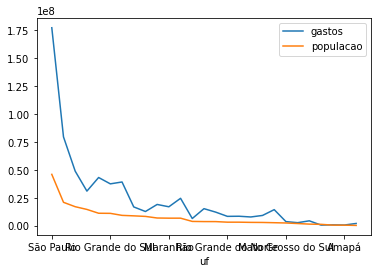

In [60]:
gastos_populacao_recente['gastos'] = gastos_populacao_recente['2021/Mar'] 
gastos_populacao_recente[['gastos', 'populacao']].plot()

Como diria o Guilherme, esse gráfico ficou horripilante. Vamos melhorá-lo:

In [61]:
#Calcular gasto/habitante: 
gastos_populacao_recente['gasto por habitante'] = gastos_populacao_recente['gastos'] /  gastos_populacao_recente['populacao']
gastos_populacao_recente

,populacao,2021/Mar,gastos,gasto por habitante
uf,,,,
São Paulo,46289333,177408317.71,177408317.71,3.83
Minas Gerais,21292666,79780838.00,79780838.00,3.75
Rio de Janeiro,17366189,49149884.48,49149884.48,2.83
Bahia,14930634,31314602.44,31314602.44,2.10
Paraná,11516840,43480729.07,43480729.07,3.78
Rio Grande do Sul,11422973,37798832.80,37798832.80,3.31
Pernambuco,9616621,39472738.81,39472738.81,4.10
Ceará,9187103,17173151.55,17173151.55,1.87
Pará,8690745,13069564.31,13069564.31,1.50


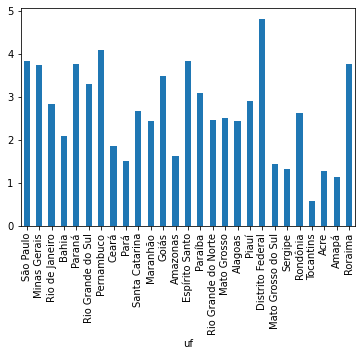

In [62]:
#Plotar gráfico:
gastos_populacao_recente['gasto por habitante'].plot(kind='bar')

Outra forma de visualização gráfica:

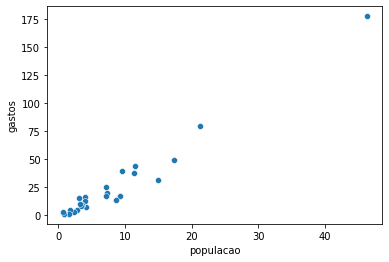

In [64]:
sns.scatterplot(data=gastos_populacao_recente/1000000, x='populacao', y='gastos') #em milhões

Deixando a largura e comprimento iguais para melhorar a visualização:

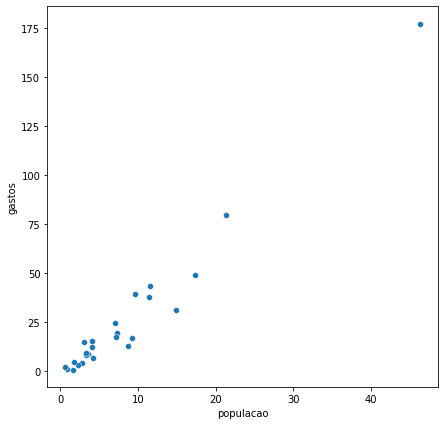

In [65]:
plt.figure(figsize=(7,7)) 
sns.scatterplot(data=gastos_populacao_recente/1000000, x='populacao', y='gastos')

Esse gráfico mostra que os gastos estão em função da população.

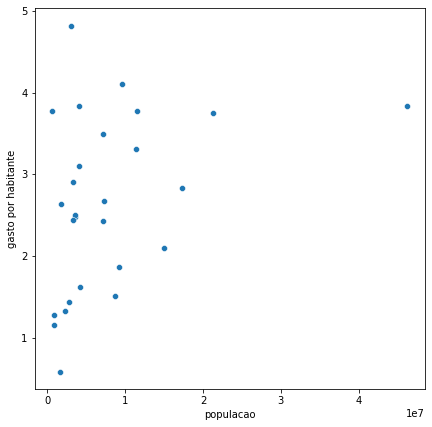

In [66]:
plt.figure(figsize=(7,7)) 
sns.scatterplot(data=gastos_populacao_recente, x='populacao', y='gasto por habitante')

Porém, quando olhamos Gasto/habitante não há mais uma tendência!

###**Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.**

In [67]:
gastos2 = gastos_populacao_recente.sort_values(by = 'gasto por habitante', ascending = False)
gastos2.head()

,populacao,2021/Mar,gastos,gasto por habitante
uf,,,,
Distrito Federal,3055149,14731938.43,14731938.43,4.82
Pernambuco,9616621,39472738.81,39472738.81,4.10
Espírito Santo,4064052,15606368.11,15606368.11,3.84
São Paulo,46289333,177408317.71,177408317.71,3.83
Paraná,11516840,43480729.07,43480729.07,3.78


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


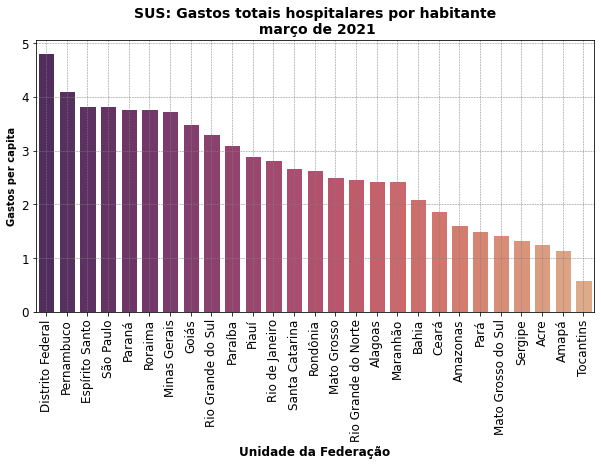

In [68]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.set_style('darkgrid')
sns.set_palette(list(reversed(sns.color_palette('flare', 27))))

sns.barplot(gastos2.index, gastos2['gasto por habitante'])

#Plotando as legendas e mudando o tamanho das fontes
plt.title('SUS: Gastos totais hospitalares por habitante\n março de 2021', fontsize=14, weight='bold')
plt.xlabel('Unidade da Federação', fontsize=12, weight='bold')
plt.ylabel('Gastos per capita', fontsize=10, weight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

###**Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.**

Escolhi fazer esse desafio usando março de 2020, para comparar se houve alguma mudança nos gastos, principalmente por causa da pandemia de SARS-CoV-2. 

In [69]:
#Selecionando o mês de interesse:
mar_2020 = ordenado_por_total.columns[-13]
mar_2020

'2020/Mar'

In [70]:
mar_2020 = ordenado_por_total[mar_2020]
mar_2020.head()

Unidade da Federação
35 São Paulo           277938674.53
31 Minas Gerais        147654942.70
41 Paraná              114776571.27
43 Rio Grande do Sul    84881491.62
33 Rio de Janeiro       74595986.00
Name: 2020/Mar, dtype: float64

In [71]:
#Soma do valor de gastos de todos os Estados, para analisar os gastos proporcionais em seguida:
mar_2020.sum()

1228127285.3300002

In [72]:
#Cálculo dos gastos proporcionais:
gastos_proporcionais_2020 = mar_2020 / mar_2020.sum()
gastos_proporcionais_2020

Unidade da Federação
35 São Paulo             0.23
31 Minas Gerais          0.12
41 Paraná                0.09
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.06
29 Bahia                 0.06
26 Pernambuco            0.05
42 Santa Catarina        0.05
23 Ceará                 0.04
52 Goiás                 0.03
15 Pará                  0.03
21 Maranhão              0.02
32 Espírito Santo        0.02
24 Rio Grande do Norte   0.02
25 Paraíba               0.01
53 Distrito Federal      0.02
50 Mato Grosso do Sul    0.01
22 Piauí                 0.01
27 Alagoas               0.01
51 Mato Grosso           0.01
13 Amazonas              0.01
28 Sergipe               0.01
17 Tocantins             0.01
11 Rondônia              0.01
12 Acre                  0.00
14 Roraima               0.00
16 Amapá                 0.00
Name: 2020/Mar, dtype: float64

In [73]:
#Gastos proporcionais ordenados do maior para o menor:
gastos_proporcionais_2020_sort = gastos_proporcionais_2020.sort_values(ascending=False)
gastos_proporcionais_2020_sort

Unidade da Federação
35 São Paulo             0.23
31 Minas Gerais          0.12
41 Paraná                0.09
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.06
29 Bahia                 0.06
26 Pernambuco            0.05
42 Santa Catarina        0.05
23 Ceará                 0.04
15 Pará                  0.03
52 Goiás                 0.03
21 Maranhão              0.02
32 Espírito Santo        0.02
24 Rio Grande do Norte   0.02
53 Distrito Federal      0.02
25 Paraíba               0.01
50 Mato Grosso do Sul    0.01
27 Alagoas               0.01
22 Piauí                 0.01
13 Amazonas              0.01
51 Mato Grosso           0.01
28 Sergipe               0.01
11 Rondônia              0.01
17 Tocantins             0.01
12 Acre                  0.00
14 Roraima               0.00
16 Amapá                 0.00
Name: 2020/Mar, dtype: float64

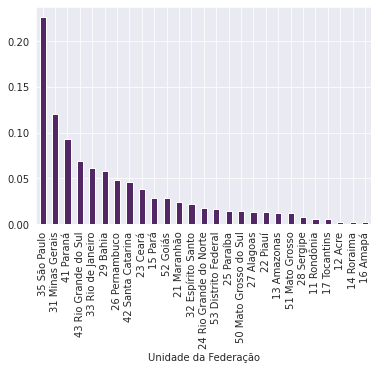

In [74]:
#Visualização gráfica dos gastos proporcionais:
gastos_proporcionais_2020_sort.plot(kind='bar')

Processo para unir os gastos de março de 2020 com a estimativa populacional:

In [75]:
mar_2020

Unidade da Federação
35 São Paulo             277938674.53
31 Minas Gerais          147654942.70
41 Paraná                114776571.27
43 Rio Grande do Sul      84881491.62
33 Rio de Janeiro         74595986.00
29 Bahia                  70998470.80
26 Pernambuco             59677257.54
42 Santa Catarina         56966558.85
23 Ceará                  46718050.22
52 Goiás                  34808037.62
15 Pará                   34908420.50
21 Maranhão               29401096.62
32 Espírito Santo         26689904.87
24 Rio Grande do Norte    20939897.73
25 Paraíba                17656498.27
53 Distrito Federal       19623112.14
50 Mato Grosso do Sul     17395566.03
22 Piauí                  15534772.69
27 Alagoas                16106494.94
51 Mato Grosso            14493916.52
13 Amazonas               14815958.58
28 Sergipe                 9226713.03
17 Tocantins               7027599.91
11 Rondônia                7251287.20
12 Acre                    2939675.20
14 Roraima                 28

In [76]:
mar_2020.index = mar_2020.index.str[3:] #retirar as três primeiras strings
mar_2020.index 

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

Obtenção dos dados de estimativa poopulacional via URL, utilizando a função `limpeza_tratamento`, criada na aula anterior:

In [77]:
def limpeza_tratamento(url, dados):

    #obtenção dos dados via URL: 
    html_content = requests.get(url).text
    soup = BeautifulSoup(html_content, "lxml")
    dados_tabela = pd.read_html(str(soup.find_all('table')[0]))
    populacao = pd.DataFrame(dados_tabela[0])
    
    populacao.drop(columns=['Posição', '% da pop. total', 'País comparável (habitantes)'], inplace=True) #Tirar colunas que não interessam
    populacao.rename(columns={'Unidade federativa':'uf', 'População':'populacao'}, inplace=True) #Renomear as colunas de interesse
    populacao.set_index('uf', inplace=True) #definir index
    populacao['populacao'] = populacao['populacao'].str.replace(' ', '').astype('int64') #remoção dos espaços em branco e conversão para números inteiros
    
    unida = populacao.join(dados) #união dos dados
    
    return populacao, unida

In [78]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao, unida = limpeza_tratamento(url, mar_2020)

In [79]:
#Agora temos os dados unidos:
unida

,populacao,2020/Mar
uf,,
São Paulo,46289333,277938674.53
Minas Gerais,21292666,147654942.70
Rio de Janeiro,17366189,74595986.00
Bahia,14930634,70998470.80
Paraná,11516840,114776571.27
Rio Grande do Sul,11422973,84881491.62
Pernambuco,9616621,59677257.54
Ceará,9187103,46718050.22
Pará,8690745,34908420.50


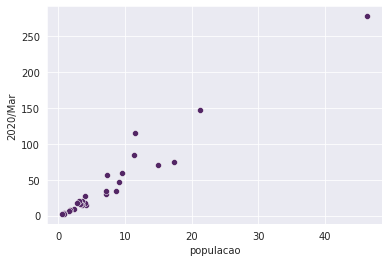

In [80]:
#Gráfico mostrando a relação de gastos pelo tamanho da população:
sns.scatterplot(data=unida/1000000, x='populacao', y='2020/Mar')

Plotando o gráfico com uma reta para evidenciar que os gastos estão relacionados ao tamanho da população:

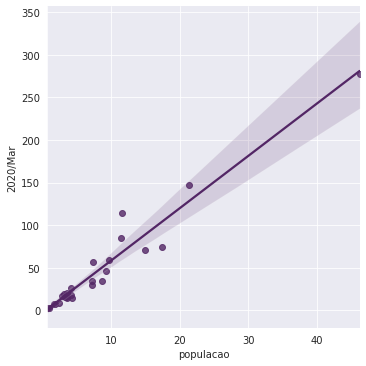

In [90]:
#Gráfico com reta:
sns.lmplot(data=unida / 1000000, x='populacao', y='2020/Mar')

Analisando os gastos por habitantes:

In [83]:
#Calcular gasto/habitante: 
unida['gasto por habitante'] = unida['2020/Mar'] /  unida['populacao']
unida

,populacao,2020/Mar,gasto por habitante
uf,,,
São Paulo,46289333,277938674.53,6.00
Minas Gerais,21292666,147654942.70,6.93
Rio de Janeiro,17366189,74595986.00,4.30
Bahia,14930634,70998470.80,4.76
Paraná,11516840,114776571.27,9.97
Rio Grande do Sul,11422973,84881491.62,7.43
Pernambuco,9616621,59677257.54,6.21
Ceará,9187103,46718050.22,5.09
Pará,8690745,34908420.50,4.02


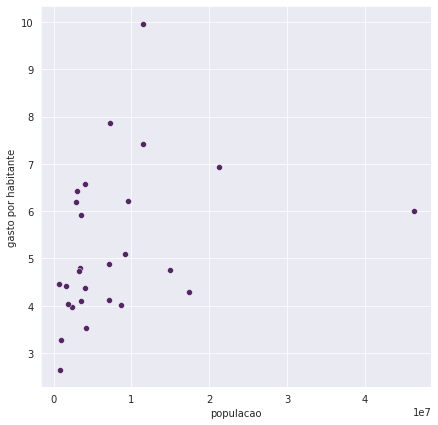

In [87]:
#Gráfico mostrando os gastos por habitantes:
plt.figure(figsize=(7,7)) 
sns.scatterplot(data=unida, x='populacao', y='gasto por habitante')

Como podemos observar, não há uma relação entre os gastos por habitantes e o tamanho da população.

###**Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.**

In [88]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    '''
    Formata os dados para cada Milhão e mostra duas casas decimais depois da vírgula
    '''
    return "%.f Mi" % (x/1E6)

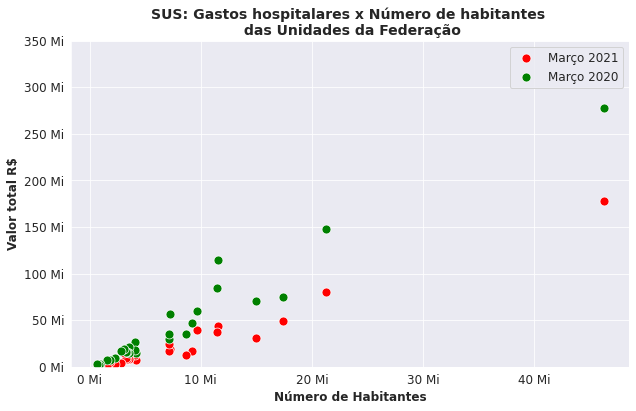

In [89]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,6)) 

sns.scatterplot(x='populacao', y='2021/Mar', data=gastos_populacao_recente .reset_index(), color='red', label='Março 2021', s=80)
sns.scatterplot(x='populacao', y='2020/Mar', data=unida.reset_index(), color='green', label='Março 2020', s=80)

plt.title('SUS: Gastos hospitalares x Número de habitantes \n das Unidades da Federação', fontsize=14, weight='bold')
plt.xlabel('Número de Habitantes', fontsize=12, weight='bold')
plt.ylabel('Valor total R$', fontsize=12, weight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 350000000)
plt.legend(fontsize=12)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)

#Mostrando o gráfico
plt.show()

Comparei a diferença de gastos entre março de 2020  e março de 2021. SP, por exemplo, gastou ~280 milhões em março de 2020 e 177 milhões em março de 2021. Não sei se essa diferença pode ser pelos dados de 2021 estarem incompletos e não terem sido totalmente processados, mas é estranho já que certamente tivemos um número considerável de gastos devido a pandemia.

##**Resolução dos desafios pelo Guilherme e Thiago, através de funções, tornando o processo mais rápido e fácil**

In [100]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes 
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]


In [97]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.8

In [101]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_populacao_recente , '2021/Fev')

In [102]:
gastos_populacao_recente

,populacao,2021/Mar,gastos,gasto por habitante,gastos_2021/Fev,gasto_por_habitante_2021/Fev
uf,,,,,,
São Paulo,46289333,177408317.71,177408317.71,3.83,268193064.06,5.79
Minas Gerais,21292666,79780838.00,79780838.00,3.75,119877417.15,5.63
Rio de Janeiro,17366189,49149884.48,49149884.48,2.83,60873103.08,3.51
Bahia,14930634,31314602.44,31314602.44,2.10,55544579.04,3.72
Paraná,11516840,43480729.07,43480729.07,3.78,83130175.37,7.22
Rio Grande do Sul,11422973,37798832.80,37798832.80,3.31,84404640.00,7.39
Pernambuco,9616621,39472738.81,39472738.81,4.10,62259409.32,6.47
Ceará,9187103,17173151.55,17173151.55,1.87,30186951.00,3.29
Pará,8690745,13069564.31,13069564.31,1.50,23343222.94,2.69


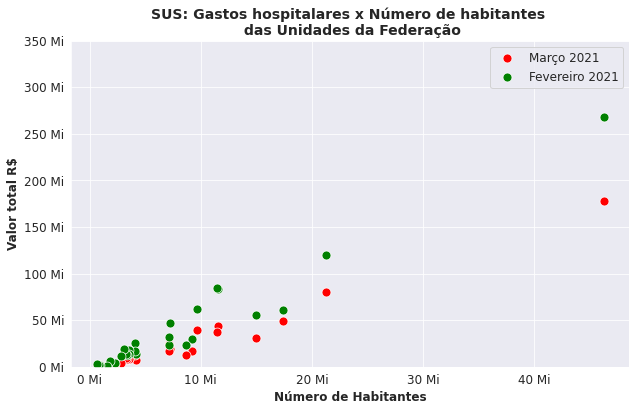

In [107]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,6)) 

sns.scatterplot(x='populacao', y="gastos", data=gastos_populacao_recente .reset_index(), color='red', label='Março 2021', s=80)
sns.scatterplot(x='populacao', y="gastos_2021/Fev", data=gastos_populacao_recente.reset_index(), color='green', label='Fevereiro 2021', s=80)

plt.title('SUS: Gastos hospitalares x Número de habitantes \n das Unidades da Federação', fontsize=14, weight='bold')
plt.xlabel('Número de Habitantes', fontsize=12, weight='bold')
plt.ylabel('Valor total R$', fontsize=12, weight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 350000000)
plt.legend(fontsize=12)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)

#Mostrando o gráfico
plt.show()

Comparei a diferença de gastos entre março de 2021  e fevereiro de 2021. SP, por exemplo, gastou ~268 milhões em fevereiro e 177 milhões em março. Provavelmente, essa diferença pode ser pelos dados de março estarem incompletos e não terem sido totalmente processados.